In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [3]:
# loading
pc_columns = list(range(0,12))
columns = ['id', 'slice'] + pc_columns + ['bass', 'mweight', 'chord']

df_wide = pd.read_csv('jsbach_chorals_harmony.data', header=None, names=columns, skipinitialspace=True)
df_wide

,id,slice,0,1,2,3,4,5,6,7,8,9,10,11,bass,mweight,chord
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M
2,000106b_,3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2,C_M
3,000106b_,4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
4,000106b_,5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,015505b_,105,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO,G,4,G_m
5661,015505b_,106,NO,NO,YES,NO,NO,NO,NO,YES,NO,YES,NO,NO,G,3,G_m
5662,015505b_,107,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,C,5,C_M
5663,015505b_,108,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,YES,NO,C,3,C_M


In [4]:
# parse chord labels
pitch_names = ['C', 'D', 'E', 'F', 'G', 'A', 'B']
pitch_semis = [0, 2, 4, 5, 7, 9, 11]
pitch_map = dict(zip(pitch_names, pitch_semis))

def root(label):
    name = label[0]
    acc = label[1]
    modifier = 1 if acc == '#' else (-1 if acc == 'b' else 0)
    return pitch_map[name] + modifier % 12

def chord_type(label):
    return label[2:]

df_wide["root"] = df_wide["chord"].map(root)
df_wide["chord_type"] = df_wide["chord"].map(chord_type)
set(df_wide["chord_type"])
df_wide

,id,slice,0,1,2,3,4,5,6,7,8,9,10,11,bass,mweight,chord,root,chord_type
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M,5,M
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M,0,M
2,000106b_,3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2,C_M,0,M
3,000106b_,4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M,5,M
4,000106b_,5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M,5,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,015505b_,105,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO,G,4,G_m,7,m
5661,015505b_,106,NO,NO,YES,NO,NO,NO,NO,YES,NO,YES,NO,NO,G,3,G_m,7,m
5662,015505b_,107,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,C,5,C_M,0,M
5663,015505b_,108,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,YES,NO,C,3,C_M,0,M


In [5]:
# melt into long format
df = df_wide.melt(['id', 'slice', 'root', 'chord_type'], list(range(12)), "pc", "occurs")
df["occurs"] = df["occurs"].map({"YES": 1, "NO": 0})

#view
df[(df['id'] == "000106b_") & (df['slice'] == 1)]

,id,slice,root,chord_type,pc,occurs
0,000106b_,1,5,M,0,1
5665,000106b_,1,5,M,1,0
11330,000106b_,1,5,M,2,0
16995,000106b_,1,5,M,3,0
22660,000106b_,1,5,M,4,0
28325,000106b_,1,5,M,5,1
33990,000106b_,1,5,M,6,0
39655,000106b_,1,5,M,7,0
45320,000106b_,1,5,M,8,0
50985,000106b_,1,5,M,9,1


In [6]:
# transposing
df['rpc'] = df.apply(lambda row: (row.pc - row.root) % 12, axis=1)

# view
df[(df['id'] == "000106b_") & (df['slice'] == 1)]

,id,slice,root,chord_type,pc,occurs,rpc
0,000106b_,1,5,M,0,1,7
5665,000106b_,1,5,M,1,0,8
11330,000106b_,1,5,M,2,0,9
16995,000106b_,1,5,M,3,0,10
22660,000106b_,1,5,M,4,0,11
28325,000106b_,1,5,M,5,1,0
33990,000106b_,1,5,M,6,0,1
39655,000106b_,1,5,M,7,0,2
45320,000106b_,1,5,M,8,0,3
50985,000106b_,1,5,M,9,1,4


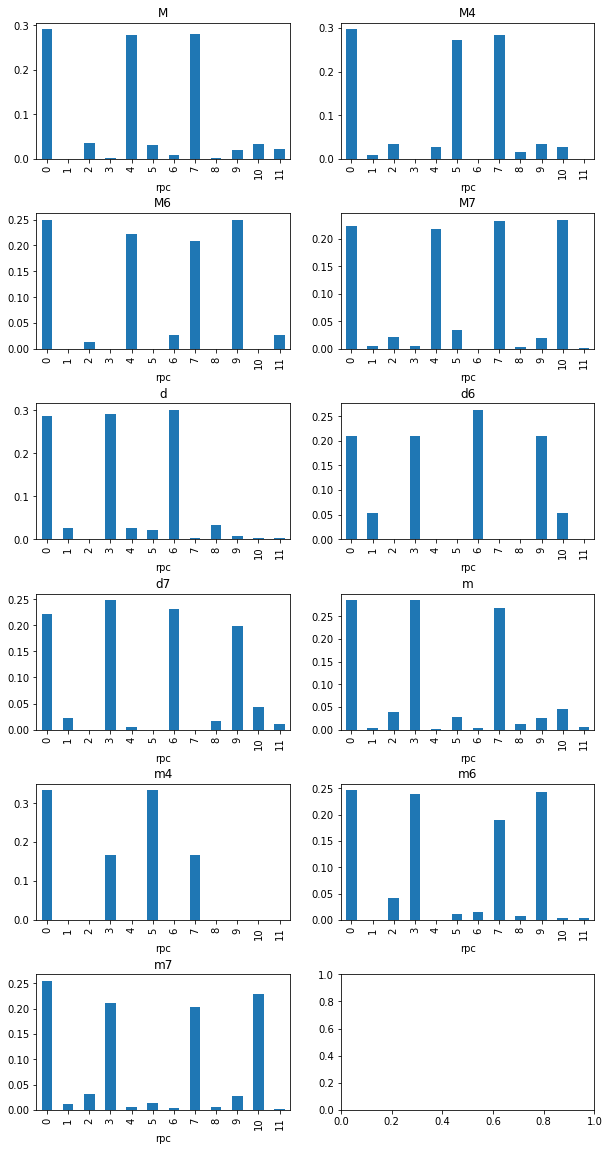

In [7]:
# create profiles
profiles = df.groupby(["chord_type", "rpc"])["occurs"].sum()
profiles = profiles.groupby("chord_type").transform(lambda prf: prf / prf.sum())

grouped = profiles.groupby("chord_type")
fig, axs = plt.subplots(6, 2, figsize=(10,20), gridspec_kw=dict(hspace=0.4))
for (name, grp), ax in zip(grouped, axs.flatten()):
    grp[name].plot.bar(ax=ax, title=name)

In [8]:
# convert and save as JSON
prof_dict = {ct: profiles[ct].to_dict() for ct in profiles.index.levels[0]}
with open('profiles.json', 'w') as out:
    json.dump(prof_dict, out, indent=2)

In [12]:
# count chord types
type_counts = df_wide.groupby("chord_type").size()
type_counts = type_counts / type_counts.sum()
with open('types.json', 'w') as out:
    json.dump(type_counts.to_dict(), out, indent=2)